In [1]:
# importing the necessary Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics

from sklearn.preprocessing import OneHotEncoder, LabelEncoder

# pip install tensorflow
import tensorflow as tf
import keras
from keras import layers

from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score

In [2]:
# reading the dataset
df = pd.read_csv("mobilepricerange.csv")

In [3]:
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [4]:
df.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [5]:
# knowing if there are duplicates in the dataset
# after running it shows zero duplicates
df.duplicated().sum()

0

In [6]:
df.isna().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [7]:
# this code sort out the correlation matrix for the orice range
# also to know the variables that are more important 
# when comparing to the price range
corr_matrix = df.corr()['price_range']
corr_matrix.sort_values(ascending=False)

price_range      1.000000
ram              0.917046
battery_power    0.200723
px_width         0.165818
px_height        0.148858
int_memory       0.044435
sc_w             0.038711
pc               0.033599
three_g          0.023611
sc_h             0.022986
fc               0.021998
talk_time        0.021859
blue             0.020573
wifi             0.018785
dual_sim         0.017444
four_g           0.014772
n_cores          0.004399
m_dep            0.000853
clock_speed     -0.006606
mobile_wt       -0.030302
touch_screen    -0.030411
Name: price_range, dtype: float64

In [8]:
# dropping some columns that are not important
# regarding price range. we used both correlations and SelectKBest-score to remove
# variables that have not that much of an effect ot the price range
removables = ["touch_screen", "mobile_wt", "clock_speed", "m_dep", "four_g", "wifi", "blue", "three_g"]

In [9]:
# now filter out the unneeded columns
df = df.drop(removables, axis=1)

In [10]:
df.head()

,battery_power,dual_sim,fc,int_memory,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,price_range
0,842,0,1,7,2,2,20,756,2549,9,7,19,1
1,1021,1,0,53,3,6,905,1988,2631,17,3,7,2
2,563,1,2,41,5,6,1263,1716,2603,11,2,9,2
3,615,0,0,10,6,9,1216,1786,2769,16,8,11,2
4,1821,0,13,44,2,14,1208,1212,1411,8,2,15,1


In [11]:
# looking at the price range 
# it is wise to replace the target variable out class
# names with more human understanding versions
df['price_range'] = df['price_range'].replace({0: "1: Cheap", 1: "2: Avg-", 2: "3: Avg+", 3: "4: Expensive"})

In [12]:
#  Now X/y -variables 
# also to encode the target variable
# other variables except the target variable
X = df.drop("price_range", axis=1)

# have only the target variable here (dependent variable)
y_temp = df['price_range']

# we have to processing the target values with an encoder
# because this is ann classification
# and convert them into a categorical TensorFlow/Keras -format 
le = LabelEncoder()
y_enc = le.fit_transform(y_temp)

# Converting the label into a matrix form
y = tf.keras.utils.to_categorical(y_enc)

In [14]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

# convert all continuous variables to integer,
# and convert all negative numbers to 0
X_cat = X.astype(int)
X_cat = X_cat.clip(lower=0)

# initialize chi2 and SelectKBest
# Note: chi2 -test is a very common test
# in statistics and quantitative analysis
# basically it studies the data whether variables are related
# or independent of each other
chi_2_features = SelectKBest(chi2, k=len(X_cat.columns))

# fit our data to the SelectKBest
best_features = chi_2_features.fit(X_cat,y.astype(int))

# use decimal format in table print later
pd.options.display.float_format = '{:.2f}'.format

# wrap it up, and show the results
# the higher the score, the more effect that column has on price
df_features = pd.DataFrame(best_features.scores_)
df_columns = pd.DataFrame(X_cat.columns)
f_scores = pd.concat([df_columns,df_features],axis=1)
f_scores.columns = ['Features','Score']
f_scores.sort_values(by='Score',ascending=False)

,Features,Score
8,ram,931267.52
6,px_height,17363.57
0,battery_power,14129.87
7,px_width,9810.59
3,int_memory,89.84
10,sc_w,16.48
11,talk_time,13.24
2,fc,10.14
9,sc_h,9.61
5,pc,9.19


In [15]:
# Now building the neural network
# the usual train/validation/test -split
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.30)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5)

In [16]:
# saving the categories into a list
categories = list(np.unique(df['price_range']))
print(categories)

['1: Cheap', '2: Avg-', '3: Avg+', '4: Expensive']


In [18]:
# first version neural network
# no optimizations depending though
model = keras.Sequential(
    [
        layers.BatchNormalization(input_shape=(len(X.columns),)),
        layers.Dense(16, activation="relu", kernel_regularizer=keras.regularizers.l1(l1=0.1)),
        layers.Dense(32, activation="relu"),
        layers.Dropout(0.2),
        layers.Dense(8, activation="relu"),
        layers.Dense(len(categories), activation="softmax")
    ]
)


# compile the model, this time we use categorical crossentropy for loss -function
# and we also measure the accuracy of our model in the metrics
model.compile(optimizer="adam", loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

c:\Users\Admin\DeepLearningSpringNew2024\DeepLearningSpringNew2024\.venv\lib\site-packages\keras\src\layers\normalization\batch_normalization.py:143: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ batch_normalization_1           │ (None, 12)             │            48 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 16)             │           208 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │           544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 8)              │           264 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 4)              │            36 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,100 (4.30 KB)

 Trainable params: 1,076 (4.20 KB)

 Non-trainable params: 24 (96.00 B)

In [19]:
# although the epoch could be adjusted
# epoch set at 500
model.fit(x=X_train, y=y_train, epochs=500, validation_data=(X_val, y_val))

Epoch 1/500
44/44 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - accuracy: 0.2629 - loss: 5.8691 - val_accuracy: 0.2933 - val_loss: 5.2626
Epoch 2/500
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3209 - loss: 5.0145 - val_accuracy: 0.3133 - val_loss: 4.4907
Epoch 3/500
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3523 - loss: 4.2733 - val_accuracy: 0.4767 - val_loss: 3.8101
Epoch 4/500
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3954 - loss: 3.5815 - val_accuracy: 0.6033 - val_loss: 3.1627
Epoch 5/500
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5028 - loss: 2.9655 - val_accuracy: 0.6600 - val_loss: 2.5667
Epoch 6/500
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5238 - loss: 2.4301 - val_accuracy: 0.6700 - val_loss: 2.0819
Epoch 7/500
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5614 - loss: 1.9637 - val_accuracy: 0.6233 - val_loss: 1.6685
Epoch 8/500
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6038 - loss: 1.5798 - val_accuracy: 0.6100 - 

<Axes: >

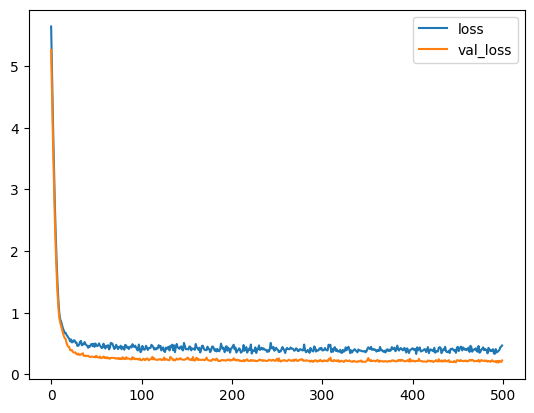

In [20]:
# plotting the loss and val_loss
loss_df = pd.DataFrame(model.history.history)
loss_df[['loss', 'val_loss']].plot()

<Axes: >

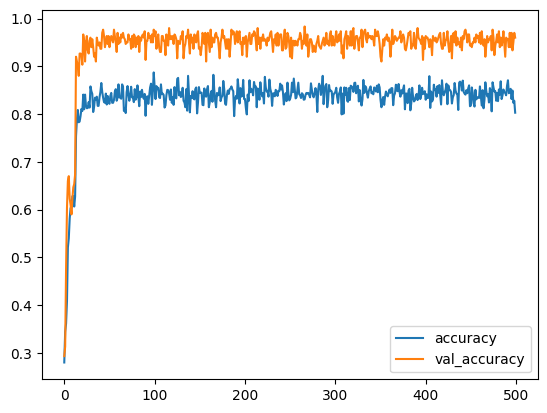

In [21]:
# accuracy and val_accuracy
loss_df[['accuracy', 'val_accuracy']].plot()

In [22]:
# compare the final model loss/accuracy/evaluation values
# the values should again match mostly
print("Test data evaluation:")
print(model.evaluate(X_test, y_test, verbose=0))
print("\nTrain data evaluation:")
print(model.evaluate(X_train, y_train, verbose=0))

Test data evaluation:
[0.23215928673744202, 0.9666666388511658]

Train data evaluation:
[0.24181383848190308, 0.9371428489685059]


In [23]:
#  for test predictions and classification metrics
# get predictions and convert with argmax() to get categories 
# instead of raw probabilities

# basically we are reverting the cross entropy
# format back to the original target variable format
# instead [0,1,0,0] => 0 or 1 or 2 or 3
test_predictions = model.predict(X_test)
test_predictions = np.argmax(test_predictions, axis=1)

# convert also y-test -values with argmax
y_test = np.argmax(y_test, axis=1)

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


<Axes: >

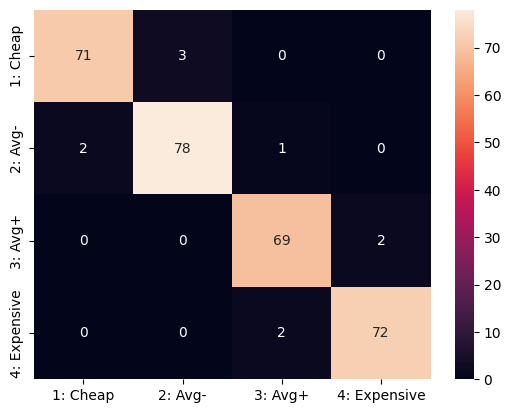

In [24]:
# the original heatmap without label names
# sns.heatmap(confusion_matrix(y_test, test_predictions), annot=True, fmt='g')

#  the actual names for the categories could be used
sns.heatmap(confusion_matrix(y_test, test_predictions), xticklabels=categories, yticklabels=categories, annot=True, fmt='g')

In [25]:
# print the classification report based on true values and predictions
# if you want to use the more human-readable versions of the outcome categories
# use the target_names -parameter
print(classification_report(y_test, test_predictions, target_names=categories))

# get overall accuracy of the model and print it
acc = accuracy_score(y_test, test_predictions)
print("\nModel overall accuracy: {:.2f}%".format(acc * 100))

              precision    recall  f1-score   support

    1: Cheap       0.97      0.96      0.97        74
     2: Avg-       0.96      0.96      0.96        81
     3: Avg+       0.96      0.97      0.97        71
4: Expensive       0.97      0.97      0.97        74

    accuracy                           0.97       300
   macro avg       0.97      0.97      0.97       300
weighted avg       0.97      0.97      0.97       300


Model overall accuracy: 96.67%


In [26]:
# The AUC score is a super sensitive metric
# you often get low scores, even 0.5

# in binary classification, AUC values are often interpreted as follows:
# A binary classifier is useful only when it achieves ROC-AUC score greater than 0.5 and as near to 1 as possible. 
# If a classifier yields a score less than 0.5, it simply means that the model is performing worse 
# than a random classifier, and therefore is useless.

# In multi category classification , AUC values are often interpreted as follows: 
# 0.5-0.6 (failed)
# 0.6-0.7 (worthless)
# 0.7-0.8 (poor)
# 0.8-0.9 (good)
# > 0.9 (excellent)

# get ROC-AUC -score
roc_auc_score(y, model.predict(X), multi_class="ovr")

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


0.9966813333333333

In [27]:
#  Making a new test prediction
df.columns

Index(['battery_power', 'dual_sim', 'fc', 'int_memory', 'n_cores', 'pc',
       'px_height', 'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time',
       'price_range'],
      dtype='object')

In [28]:
df.head()

,battery_power,dual_sim,fc,int_memory,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,price_range
0,842,0,1,7,2,2,20,756,2549,9,7,19,2: Avg-
1,1021,1,0,53,3,6,905,1988,2631,17,3,7,3: Avg+
2,563,1,2,41,5,6,1263,1716,2603,11,2,9,3: Avg+
3,615,0,0,10,6,9,1216,1786,2769,16,8,11,3: Avg+
4,1821,0,13,44,2,14,1208,1212,1411,8,2,15,2: Avg-


In [29]:
# trying out some new imaginary data
# modify this as needed regarding your own dataset
tester_row = {
    'battery_power': 1000, 
    'dual_sim': 0 ,
    'fc': 4, 
    'int_memory': 4, 
    'n_cores': 1, 
    'pc': 4,
    'px_height': 900,
    'px_width': 1200, 
    'ram': 2096, 
    'sc_h': 7, 
    'sc_w': 4, 
    'talk_time': 12
}

# convert to pandas-format
tester_row = pd.DataFrame([tester_row])
result = model.predict(tester_row)[0]
print(result.round(3))

result_index = np.argmax(result)
print(result_index)

# print the actual name with this index
result_text = categories[result_index]

# print the result
print(f"Predicted price range: {result_text}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
[0.002 0.649 0.349 0.   ]
1
Predicted price range: 2: Avg-


In [30]:
# save our model to a file
# used for userapp.py 
model.save("mobilephoneprice.keras")